# Exploratory Data Analysis (EDA) with Housing Price Dataset

Exploratory Data Analysis (EDA) is a crucial step in the data analysis pipeline. It helps us understand the data, discover patterns, spot anomalies, and frame hypotheses. In this lesson, we'll use a housing price dataset to explore various EDA techniques.

## Initial Steps for Data Analysis

The initial steps for data analysis in Python include:

1. **Data Acquisition:** This involves gathering data from various sources such as local files, databases, APIs, websites, etc.
 
2. **Loading the Data:** Common formats to consider are CSV (Comma Separated Values), JSON, XLS, HTML, XML, and more.

3. **Exploratory Data Analysis (EDA):** EDA is a systematic approach to initial data inspection. It leverages **descriptive analysis** techniques to understand the data better, identify outliers, highlight significant variables, and generally uncover underlying data patterns. Additionally, EDA helps in organizing the data, spotting errors, and assessing missing values.

4. **Data Cleaning:** It's crucial to check the available data and perform tasks such as removing empty columns, standardizing terms, imputing missing data where appropriate, and more.

5. After cleaning, you should conduct a more in-depth exploratory data analysis to further understand the data.

## Methods in EDA

EDA methodologies can be broadly categorized into:

- **Numerical Measures:** These can include coefficients, frequency counts, and other statistical metrics.
  
- **Visual Representations:** Examples are histograms, scatter plots, pie charts, and more.

Additionally, based on the number of variables in focus, methods can be:

- **Univariate:** Describing the characteristics of a single variable at a time.
  
- **Bivariate:** Analyzing the relationship between two variables, either in tandem or understanding one variable based on the other (examining the influence of one independent variable in relation to the dependent variable).
  
- **Multivariate:** An extension of bivariate analysis but for multiple variables. It explores the relationships among them or the impact of two or more independent variables (sometimes along with associated variables or covariates) on one or more dependent variables.

**Note:**
It's crucial to ensure that all our analytical methods are tailored to the type of variable under consideration.


## Loading the Dataset

Before we dive into EDA, let's gather our data. In this case, we will load our dataset and take a quick look at its structure.


The dataset can be found [here](https://raw.githubusercontent.com/data-bootcamp-v4/data/main/housing_price_eda.csv) and the information about the dataset [here](https://github.com/data-bootcamp-v4/data/blob/main/housing_price_dataset_info.md).

In [201]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

In [203]:
# Loading the housing price dataset (assuming the file name is "housing_price.csv")
df = pd.read_csv("https://raw.githubusercontent.com/data-bootcamp-v4/data/main/housing_price_eda.csv")

## Initial Exploration

Before diving into the specifics of univariate analysis, it's essential to get acquainted with our dataset.


In [207]:
# Display the first few rows of the dataset
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [209]:
# Retrieving the number of rows and columns in the dataframe
df.shape

(1460, 81)

In [211]:
# Displaying the data types of each column in the dataframe
df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

### Exploring numerical and categorical variables

We'll explore numerical and categorical variables, and create two dataframes, one for each type of variable.

**Note**: 
- **Numerical variables**: These can encompass both quantitative and qualitative information. Often, discrete numerical variables with limited distinct values hint at qualitative (categorical) variable encoded as numbers.

- **Object variables**: Typically, these consist of qualitative data, numeric data in a string format, or data that might not be directly relevant to the analysis. Examples include identifiers like 'ID' numbers or 'Names'. Variables with a broad range of unique values, especially in string format, often fall into this category. 


In [216]:
# Retrieving the unique data types present in the dataframe columns
list(set(df.dtypes.tolist()))

[dtype('int64'), dtype('float64'), dtype('O')]

In [218]:
# Extracting column names with numerical data types from the dataframe
df.select_dtypes("number").columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [220]:
# Counting and sorting the unique values for each numerical column in descending order
df.select_dtypes("number").nunique().sort_values(ascending=False)

Id               1460
LotArea          1073
GrLivArea         861
BsmtUnfSF         780
1stFlrSF          753
TotalBsmtSF       721
SalePrice         663
BsmtFinSF1        637
GarageArea        441
2ndFlrSF          417
MasVnrArea        327
WoodDeckSF        274
OpenPorchSF       202
BsmtFinSF2        144
EnclosedPorch     120
YearBuilt         112
LotFrontage       110
GarageYrBlt        97
ScreenPorch        76
YearRemodAdd       61
LowQualFinSF       24
MiscVal            21
3SsnPorch          20
MSSubClass         15
TotRmsAbvGrd       12
MoSold             12
OverallQual        10
OverallCond         9
PoolArea            8
BedroomAbvGr        8
GarageCars          5
YrSold              5
KitchenAbvGr        4
Fireplaces          4
BsmtFullBath        4
FullBath            4
HalfBath            3
BsmtHalfBath        3
dtype: int64

In [222]:
# Separating between discrete and continuous variables, as discrete ones could potentially be treated as categorical.
# Remember to adjust the threshold (in this case, < 20) based on your dataset's specific characteristics and domain knowledge.
potential_categorical_from_numerical = df.select_dtypes("number").loc[:, df.select_dtypes("number").nunique() < 20]
potential_categorical_from_numerical

,MSSubClass,OverallQual,OverallCond,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,PoolArea,MoSold,YrSold
0,60,7,5,1,0,2,1,3,1,8,0,2,0,2,2008
1,20,6,8,0,1,2,0,3,1,6,1,2,0,5,2007
2,60,7,5,1,0,2,1,3,1,6,1,2,0,9,2008
3,70,7,5,1,0,1,0,3,1,7,1,3,0,2,2006
4,60,8,5,1,0,2,1,4,1,9,1,3,0,12,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,6,5,0,0,2,1,3,1,7,1,2,0,8,2007
1456,20,6,6,1,0,2,0,3,1,7,2,2,0,2,2010
1457,70,7,9,0,0,2,0,4,1,9,2,1,0,5,2010
1458,20,5,6,1,0,1,0,2,1,5,0,1,0,4,2010


In [224]:
# Retrieving column names with object (typically string) data types from the dataframe
df.select_dtypes("object").columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [226]:
# Counting and sorting the unique values for each object (string) column in descending order
df.select_dtypes("object").nunique().sort_values(ascending=False)

# All columns seem categorical, as there isn't a wide variability of values.

Neighborhood     25
Exterior2nd      16
Exterior1st      15
SaleType          9
Condition1        9
Condition2        8
HouseStyle        8
RoofMatl          8
Functional        7
BsmtFinType2      6
Heating           6
RoofStyle         6
SaleCondition     6
BsmtFinType1      6
GarageType        6
Foundation        6
Electrical        5
FireplaceQu       5
HeatingQC         5
GarageQual        5
GarageCond        5
MSZoning          5
LotConfig         5
ExterCond         5
BldgType          5
BsmtExposure      4
MiscFeature       4
Fence             4
LotShape          4
LandContour       4
BsmtCond          4
KitchenQual       4
ExterQual         4
BsmtQual          4
LandSlope         3
GarageFinish      3
MasVnrType        3
PavedDrive        3
PoolQC            3
Utilities         2
CentralAir        2
Street            2
Alley             2
dtype: int64

Decide based on domain knowledge and the above explorations which numerical columns are better as categorical
 and vice versa. 
 
 For demonstration purposes, let's assume the *potential_categorical_from_numerical* are categorical, even though this might not be the case in a real scenario.

In [229]:
# Extracting columns with object (typically string) data types to create a categorical dataframe
# For demonstration purposes, let's consider the columns in potential_categorical_from_numerical as categorical variables.
df_categorical = pd.concat([df.select_dtypes("object"), potential_categorical_from_numerical], axis=1)

# Adjusting the numerical dataframe by removing the moved columns
df_numerical = df.select_dtypes("number").drop(columns=potential_categorical_from_numerical.columns)

In [231]:
# Verifying that the total number of columns in the dataframe is the sum of object (string) and numerical columns
len(df.columns) == len(df.select_dtypes("object").columns) + len(df.select_dtypes("number").columns)

True

In the data cleaning phase, it's important to focus on several essential aspects. First, verify that data is in the correct type and format (**Data Typing/Formatting**). Then, identify and address any duplicates to eliminate redundancy (**Duplicates**). Next, tackle missing values by finding and managing null or absent data (**Missing Values**). For categorical variables, like gender, review the categories (e.g., M, F, Masculine) and their distributions to determine if cleaning is needed (**Categorical Variables**). Similarly, assess numerical data for consistency. Finally, evaluate outliers to decide how to handle these extreme values (**Outliers**). Effective exploration of these areas is crucial for comprehensive data cleaning.

We won't be delving into this now, as we already reviewed it in data cleaning lessons (expect for outliers, which we'll be reviewing later in this lesson). For now, we will just clean null values, so we can focus in univariate analysis.

## Data Cleaning


### Checking for Missing Data

Missing data can influence our analysis. It's essential to identify and handle them appropriately.


In [236]:
df['PoolQC'].unique()

array([nan, 'Ex', 'Fa', 'Gd'], dtype=object)

In [238]:
# Checking for missing data
df.isnull().sum().sort_values(ascending=False)

PoolQC         1453
MiscFeature    1406
Alley          1369
Fence          1179
MasVnrType      872
               ... 
ExterQual         0
Exterior2nd       0
Exterior1st       0
RoofMatl          0
SalePrice         0
Length: 81, dtype: int64

In [240]:
# Identifying columns in the dataframe where over 80% of the values are missing
df.columns[df.isnull().mean() > 0.8]

Index(['Alley', 'PoolQC', 'Fence', 'MiscFeature'], dtype='object')

In [242]:
# Filtering out columns in the dataframe where more than 80% of the values are missing
df = df[df.columns[df.isnull().mean() < 0.8]]

In [244]:
# Removing the "Id" column from the dataframe
df.drop("Id", inplace=True, axis=1)

## Univariate Analysis

Univariate analysis, as its name suggests, concentrates on one variable at a time, giving us a deep understanding of its characteristics. This fundamental step in Exploratory Data Analysis (EDA) lays the groundwork for subsequent analyses involving multiple variables. Let's explore various techniques for both categorical and numerical variables.

**Categorical variables**:
- Frequency tables. Counts and proportions.
- Visualizations: Bar charts, pie charts

**Numerical variables**: 
- Measures of centrality: Mean, median, mode
- Measures of dispersion: Variance,  standard deviation, minimum, maximum, range, quantiles
- Shape of the distribution: Symmetry and kurtosis
- Visualizations: Histograms, box plots

### Categorical Variables

Categorical variables represent categories or labels, like types or groups. Analyzing categorical data involves understanding the frequency or proportion of each category.

#### Frequency Tables

Frequency tables are tabular representations that display the number of occurrences of each category. They help in understanding the distribution of categories in a dataset.

In python, we can use:
- `value_counts()`
- `pd.crosstab()`

Let's consider *MSZoning* as our categorical variable of interest, which represents the general zoning classification of the sale.

We'll look at `value_counts()`.

In [252]:
# Frequency table for 'MSZoning'
frequency_table = df['MSZoning'].value_counts()

# Calculating the proportion of each unique value in the 'MSZoning'
proportion_table = df['MSZoning'].value_counts(normalize=True)

frequency_table, proportion_table

(MSZoning
 RL         1151
 RM          218
 FV           65
 RH           16
 C (all)      10
 Name: count, dtype: int64,
 MSZoning
 RL         0.788356
 RM         0.149315
 FV         0.044521
 RH         0.010959
 C (all)    0.006849
 Name: proportion, dtype: float64)

The frequency table gives the count of each zoning type, while the proportion table provides the percentage representation of each category in the dataset. This helps to quickly identify dominant and minority categories.

Let's look at `pd.crosstab()`. The crosstab function can be useful to compute a cross-tabulation of two (or more) factors. Here, it's used to count the occurrences of each 'MSZoning' type.

In [256]:
# Creating a crosstab table for the 'MSZoning' column, counting occurrences for each unique value
my_table = pd.crosstab(index = df_categorical["MSZoning"],  # Make a crosstab
                              columns="count")      # Name the count column
my_table

col_0,count
MSZoning,
C (all),10
FV,65
RH,16
RL,1151
RM,218


We can also get the proportion_table the following way:

In [259]:
# Calculating the proportions for each value in 'my_table' and rounding the results to two decimal places
(my_table/my_table.sum()).round(2)

col_0,count
MSZoning,
C (all),0.01
FV,0.04
RH,0.01
RL,0.79
RM,0.15


The crosstab table displays the number of occurrences of each 'MSZoning' type, just like the frequency table. Computing the proportion table showcases the relative percentage of each category.

**Insights** for 'MSZoning':

- The most common zoning classification is 'RL', which stands for Residential Low Density, comprising approximately 78.8% of the properties in the dataset.
- The second most frequent zoning classification is 'RM' (Residential Medium Density), making up roughly 14.9%.

#### Visualizations

Visualizations offer a more intuitive understanding of categorical data distribution. Bar charts and pie charts are common methods to visually represent categorical data.

##### Bar charts

Bar charts can display the frequency or proportion of each category using bars of varying lengths. Here, the same data is visualized using three different methods: `sns.barplot()` and `sns.countplot()`.

Let's see how to use the `sns.barplot()` function with the result from `value_counts()` and `pd.crosstab()`. We should expect the same plot for both following lines of code.

In [267]:
import seaborn as sns
import pandas as pd

In [269]:
# Plotting a bar chart using the values from the frequency table, with colors sourced from the "Set3" palette
sns.barplot(x=frequency_table.index, y=frequency_table.values, palette="Set3");

/var/folders/2q/9q710plj5b1384hmw3491s7r0000gn/T/ipykernel_7936/1484790106.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=frequency_table.index, y=frequency_table.values, palette="Set3");


In [270]:
# Plotting a bar chart using the 'count' values from 'my_table', with colors sourced from the "Set3" palette
sns.barplot(x=my_table.index, y=my_table["count"], palette="Set3");

/var/folders/2q/9q710plj5b1384hmw3491s7r0000gn/T/ipykernel_7936/3018721659.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=my_table.index, y=my_table["count"], palette="Set3");


In [271]:
sns.countplot(x=df['MSZoning'])

<Axes: xlabel='MSZoning', ylabel='SalePrice'>

Using matplotlib, would just be:

```python
my_table.plot.bar()
```

**Insights** from the Bar Charts:

1. Both bar charts confirm the dominance of the `RL` zoning classification within the dataset. 
2. The bar representing `RL` is significantly taller than the others, emphasizing its higher frequency.
3. The two charts are identical, showcasing that both `value_counts()` and `pd.crosstab()` provide similar counts for the categories.

##### Countplots

A countplot is a type of bar plot in Seaborn that displays the count of occurrences of unique values in a categorical column.

Same result now as the *bar plot* since it just assumes Y axis is the count of frequencies. 

/var/folders/2q/9q710plj5b1384hmw3491s7r0000gn/T/ipykernel_7936/1376544451.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='MSZoning', palette="deep");


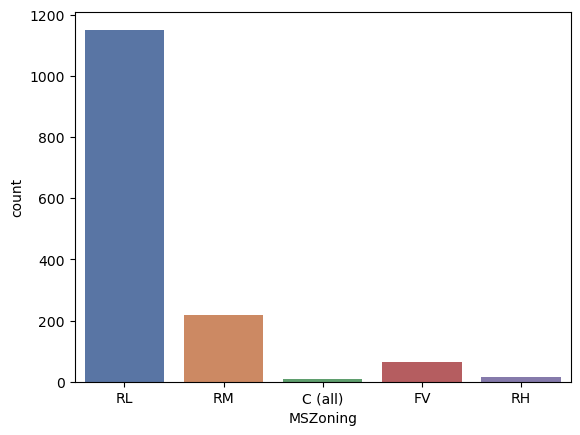

In [323]:
# Plotting a count plot for the 'MSZoning' column from the dataframe 'df', using the "Set3" palette for coloring
sns.countplot(data=df, x='MSZoning', palette="deep");
plt.show()

##### Pie charts



Pie charts provide a circular representation of the data, showing the proportion of each category as slices of a pie. However, they can be challenging to interpret when there are many categories or when categories have similar proportions.

Seaborn, as of 2023, does not have a dedicated function for pie charts. Pie charts are more commonly created using `matplotlib`, which Seaborn is built upon.

In [283]:
# Plotting a pie chart of the 'MSZoning' column value counts, with percentage labels, 
# starting at angle 90, and using colors from the "Set3" Seaborn palette
df['MSZoning'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set3"))

<Axes: xlabel='MSZoning', ylabel='count'>

**Insights**:

- The pie chart provides a clear visual representation of the dominance of the 'RL' (Residential Low Density) zoning classification, occupying a significant portion of the chart.
- Other zoning types like 'RM', 'FV', 'RH', and 'C (all)' occupy much smaller slices, emphasizing the skewed distribution.
- While pie charts can illustrate proportions effectively, the dominance of 'RL' makes it somewhat challenging to discern differences between the smaller categories. This underscores why alternative visualizations, like bar charts, can sometimes be more informative for such distributions.

### Numerical Variables

Numerical variables are quantitative, and their values can be measured. Analyzing numerical data involves understanding its distribution, central tendency, and variability.


#### Summary Statistics

**Centrality and Dispersion Measures**

Let's start by getting some basic statistics on our dataset to understand its scale, centrality, and spread.


- The `.describe()` method provides key statistics for numerical columns (by default) in a dataframe, excluding NaN values; although it primarily targets numeric data, the `include` parameter allows for the selection of other data types.

In [290]:
# Summary statistics for the dataset
df.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


From `describe()` we get:
- Measures of centrality: mean, median (indicated as 50%)
- Measures of dispersion: standard deviation (std), minimum, maximum, quartiles (Q1, Q2, Q3, indicated as 25%, 50%, and 75% respectively)

**Insights** from Summary Statistics for 'SalePrice':

- The average (mean) sale price of the houses in the dataset is approximately `$180,921`.

- The median sale price (middle value when sorted) stands at `$163,000`. Notably, the median is lower than the mean, suggesting a skew in the distribution of sale prices towards higher values.

- The standard deviation, a measure of the amount of variation or dispersion in the sale prices, is approximately `$79,442`. This indicates that sale prices can vary significantly from the average.

- The minimum and maximum sale prices are `$34,900` and `$755,000`, respectively, highlighting a wide range of property values in the dataset.

- The interquartile range (IQR), given by the values at 25% (Q1) and 75% (Q3), is between `$129,975` and `$214,000`. This means that 50% of the houses in the dataset were sold within this price range.

#### More Centrality and Dispersion Measures

Now, suppose we want to calculate individual statistical measures without using the `.describe()` method. Here are some ways to do it:

- `df[column].mean()`: Computes the mean of the selected column.
- `df[column].median()`: Calculates the median of the selected column.
- `df[column].mode()`: Identifies the mode of the selected column.
- `df[column].std()`: Determines the standard deviation of the selected column.
- `df[column].var()`: Computes the variance of the selected column.
- `df[column].min()`: Finds the minimum value in the selected column.
- `df[column].max()`: Finds the maximum value in the selected column.
- `df[column].count()`: Counts the number of non-NaN entries in the selected column.

In these examples, replace `column` with the name of the column you want to analyze.

For this section, we'll focus on 'SalePrice' as our numerical variable of interest, which represents the price at which the house was sold.

**Measures of Centrality**

In [299]:
mean_price = df['SalePrice'].mean()
median_price = df['SalePrice'].median()
mode_price = df['SalePrice'].mode()[0]

mean_price, median_price, mode_price

(180921.19589041095, 163000.0, 140000)

**Measures of Dispersion**

In [302]:
variance_price = df['SalePrice'].var()
std_dev_price = df['SalePrice'].std()
min_price = df['SalePrice'].min()
max_price = df['SalePrice'].max()
range_price = max_price - min_price
quantiles_price = df['SalePrice'].quantile([0.25, 0.5, 0.75])

variance_price, std_dev_price, min_price, max_price, range_price, quantiles_price

(6311111264.297451,
 79442.50288288663,
 34900,
 755000,
 720100,
 0.25    129975.0
 0.50    163000.0
 0.75    214000.0
 Name: SalePrice, dtype: float64)

In [304]:
df['SalePrice'].quantile(0.1) # We can get any quantile value, not just quartiles

106475.0

**Insights** from Measures of Centrality and Dispersion for 'SalePrice', for those metrics not calcualted in `describe()`:

- **Centrality**:
  - The most frequent (mode) sale price is $140,000. This value appears more frequently than any other price in the dataset.
  
- **Dispersion**:
  - The variance, a measure of how far each sale price in the set is from the mean, is approximately \(6,311,111,264\). A high variance implies that sale prices can be quite different from one another.
  - The range of sale prices is $720,100, calculated as the difference between the maximum and minimum prices. This wide range underscores the diversity in property prices within the dataset.

#### Shape of the Distribution

Skewness and kurtosis provide insights into the shape of the data distribution. Skewness indicates the asymmetry, and kurtosis tells us about the "tailedness" or how peaked the distribution is.

In [325]:
skewness_price = df['SalePrice'].skew()
kurtosis_price = df['SalePrice'].kurtosis()

skewness_price, kurtosis_price
plt.show()

- Skewness of 'SalePrice': \(1.88\)
- Kurtosis of 'SalePrice': \(6.54\)

**Insights**:

1. **Skewness**: The positive value of skewness (1.88) for the 'SalePrice' indicates that the distribution is right-skewed. This means that the tail on the right side (higher prices) is longer than the left side (lower prices). In practical terms, this suggests that there are a significant number of houses that are sold at higher prices, which are acting as outliers and pulling the mean upwards.
  
2. **Kurtosis**: The kurtosis value of 6.54 is greater than 3, which indicates that the 'SalePrice' distribution has heavier tails and a sharper peak compared to a normal distribution. This means that there are more outliers (extreme values) in the 'SalePrice' than one would expect in a normally distributed set.

The skewness and kurtosis values suggest that there are some houses that are sold at significantly higher prices than the majority, and these are affecting the overall distribution of house prices in the dataset.

#### Visualizations

Visual tools like histograms and box plots offer insights into the distribution, variability, and potential outliers in numerical data.

##### Histograms

Histograms display the frequency distribution of a dataset. The height of each bar represents the number of data points in each bin.

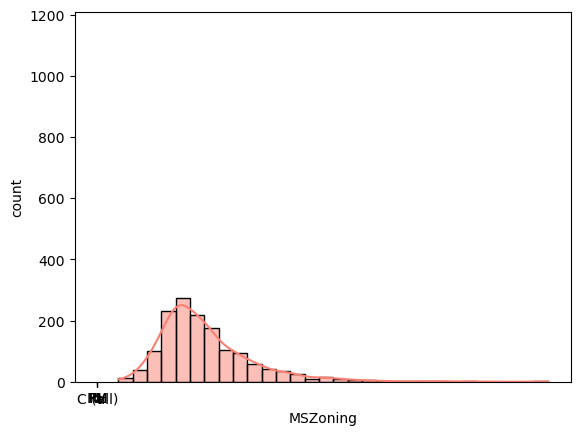

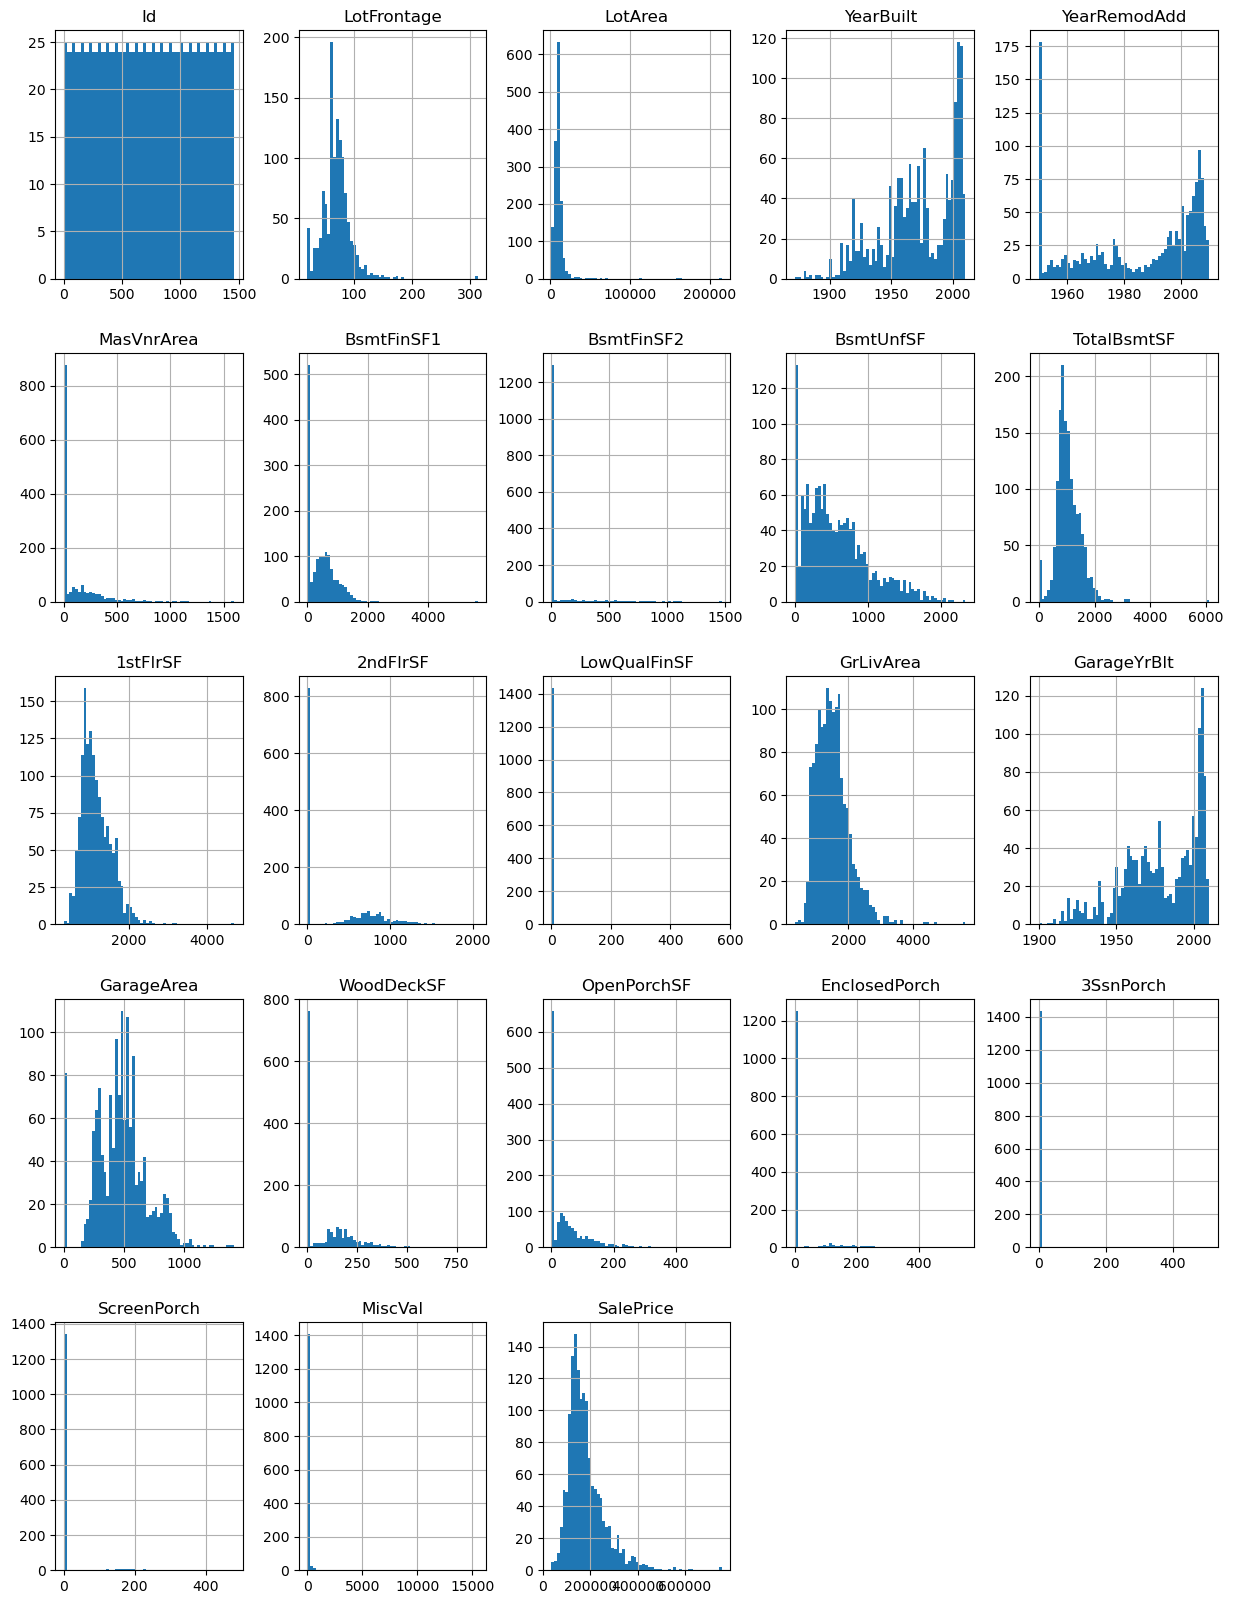

In [319]:
# Plotting a histogram for the 'SalePrice' column of the 'data' dataframe
# 'kde=True' adds a Kernel Density Estimate plot to give an approximation of the data's distribution
# 'bins=30' divides the data into 30 bins for more detailed granularity
# 'color="salmon"' sets the color of the bars to salmon
sns.histplot(df['SalePrice'], kde=True, bins=30, color="salmon")
plt.show()

**Insights:**
- The histogram reveals that the majority of the houses are sold in the price range of approximately `$100,000` to `$250,000`. However, there's a long tail on the right side, confirming our earlier inference from the skewness value that there are houses sold at much higher prices. The Kernel Density Estimate (the smooth line) also shows the right-skewed nature of the distribution.

If we wanted to plot at the same time all the numerical variables with histograms, without a for loop, we could do so using matplotlib:

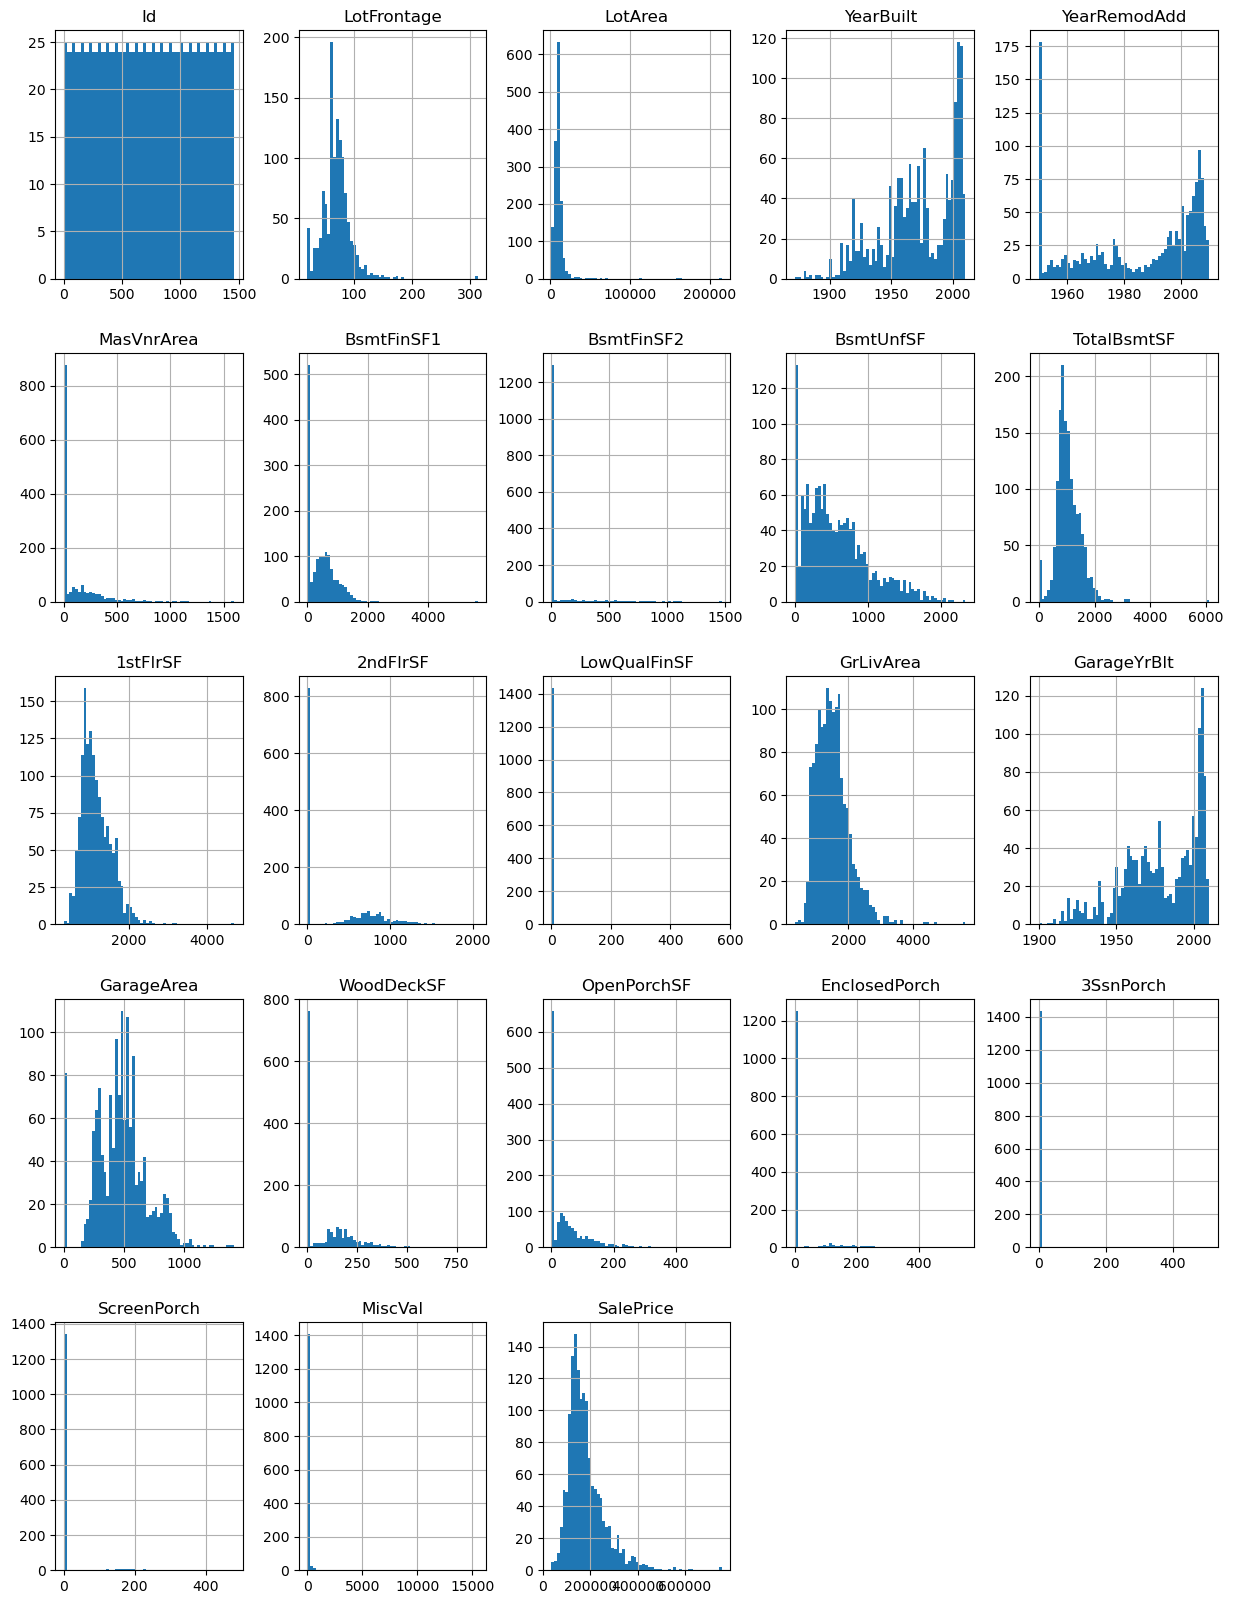

In [329]:
# Creating histograms for each numerical column in 'df_numerical'
df_numerical.hist(figsize=(15, 20), bins=60, xlabelsize=10, ylabelsize=10);
plt.show()

Just by looking at it, which ones do you think could be correlated to SalePrice?

##### Box plots

Box plots, or whisker plots, showcase the central 50% of the data (interquartile range), potential outliers, and other statistical properties.

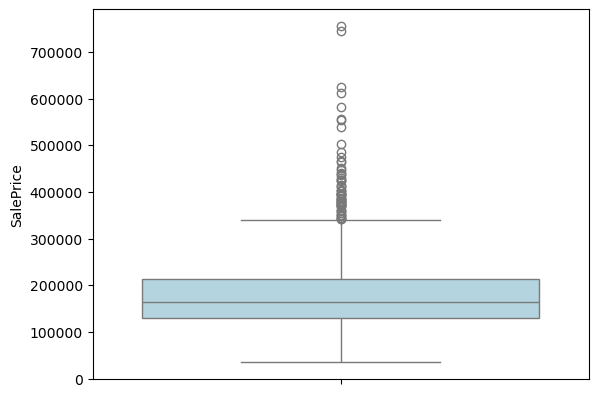

In [321]:
# Plotting a boxplot for the 'SalePrice' column with a light blue color
sns.boxplot(data = df['SalePrice'], color="lightblue")
plt.show()


**Insights:**
- The box plot gives us a visual representation of the central 50% of the data (the interquartile range) with the median price shown as a line inside the box. The whiskers extend to 1.5 times the interquartile range, and points outside of this range are considered outliers. As observed, there are several outlier points on the higher end of the sale prices, which aligns with our earlier insights about houses sold at significantly higher prices.

Both visualizations underscore the presence of outliers in the higher price range. These outliers might be luxury homes or properties in prime locations, and special attention might be needed when building predictive models, as these outliers can influence model performance.

## Converting continuous to discrete variables: Discretization

Discretization is the process of converting continuous variables into discrete ones by creating a set of contiguous intervals (or bins) and then categorizing the variables into these intervals. This can be particularly useful when you want to categorize a continuous variable into different groups based on ranges. Note that we usually lose information in this process.

For our dataset, let's take the 'SalePrice' column, which is continuous, and discretize it into categories like 'Low', 'Medium', 'High', and 'Very High'.

In [340]:
# Discretizing 'SalePrice' into 4 categories
bins = [0, 100000, 200000, 300000, df['SalePrice'].max()]
labels = ['Low', 'Medium', 'High', 'Very High']
df['SalePrice_category'] = pd.cut(df['SalePrice'], bins=bins, labels=labels, include_lowest=True)

In [342]:
df.SalePrice_category.value_counts()

SalePrice_category
Medium       910
High         312
Low          123
Very High    115
Name: count, dtype: int64

Another useful option is **discretizing by quantiles**. This means dividing the data into intervals based on specific quantile values. This ensures that each bin has (approximately) the same number of data points. The `pandas` library provides a convenient method, `qcut()`, for this purpose.

Discretizing by quantiles can be particularly useful when you want to create categories that represent relative rankings (like low, medium, high, etc.) based on the distribution of the data, rather than fixed numeric ranges.

**Step 1**: Choose the number of quantiles (or bins). For example, if you want quartiles, you would choose 4 bins. 

**Step 2**: Use the `qcut()` function from `pandas`.

In [345]:
# Discretizing 'SalePrice' into quartiles
df['SalePrice_quantile'] = pd.qcut(df['SalePrice'], q=4, labels=['Q1', 'Q2', 'Q3', 'Q4'])

df.SalePrice_category.value_counts()

SalePrice_category
Medium       910
High         312
Low          123
Very High    115
Name: count, dtype: int64

In the above code:
- `q=4` indicates that we want to divide the data into 4 quantiles (quartiles).
- `labels=['Q1', 'Q2', 'Q3', 'Q4']` provides custom labels for each quantile bin.

The resulting 'SalePrice_quantile' column will categorize each house's sale price into one of the four quartiles.

By discretizing 'SalePrice', we have transformed a continuous variable into categorical bins. This can simplify the analysis by grouping houses into broad price categories. For example, you can now easily analyze the number of houses in each price range or determine if certain features are more common in high-priced houses compared to low-priced ones.

### 💡 Check for understanding

Discretize the '1stFlrSF' column (first-floor square feet) into three categories: 'Small', 'Medium', 'Large'. Set the bins such that 'Small' includes sizes up to the 33rd percentile, 'Medium' includes sizes from the 33rd to the 66th percentile, and 'Large' includes sizes from the 66th percentile onward. How many houses fall into each category?

In [ ]:
# Your code goes here

## Summary

In this lesson, we've conducted a comprehensive univariate analysis:

- For **categorical variables**, we visualized the distribution of our zoning classifications with bar and pie charts, backed by frequency tables.
- For **numerical variables**, we explored the central tendencies, dispersions and shape of distribution of our sale prices, visualized through histograms and box plots.

This analysis allows us to deeply understand each variable, laying a strong foundation for subsequent multivariate analyses.

## 💡 Check for understanding

**Scenario**:
Given the 'TotRmsAbvGrd' column (total rooms above ground), let's dive deep into its univariate characteristics.

**Tasks**:

1. **Data Aggregation**:
    - Create a frequency table for 'TotRmsAbvGrd' to understand the distribution of the number of rooms in houses.
    - Calculate the mean, median, mode, variance, and standard deviation of 'TotRmsAbvGrd'.

2. **Visualization**:
    - Plot a histogram for 'TotRmsAbvGrd' to understand its distribution.
    - Plot a box plot for 'TotRmsAbvGrd' to visualize its central tendency, spread, and potential outliers.

3. **Interpretation**:
    - Is the distribution of the number of rooms skewed? If so, in which direction?
    - Based on the histogram and box plot, what can you infer about the common number of rooms above ground in houses? 
    - Are there any noticeable outliers in the number of rooms? If so, are there more houses with unusually many rooms or unusually few?


In [ ]:
# Your code goes here